In [1]:
import tensorflow as tf
from tensorflow import keras

from keras import regularizers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Average
from tensorflow.keras.models import Model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

1.14.0


/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-package

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
train_labels = keras.utils.to_categorical(train_labels, len(class_names))
test_labels = keras.utils.to_categorical(test_labels, len(class_names))

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
train_labels.shape

(60000, 10)

In [7]:
test_labels.shape

(10000, 10)

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

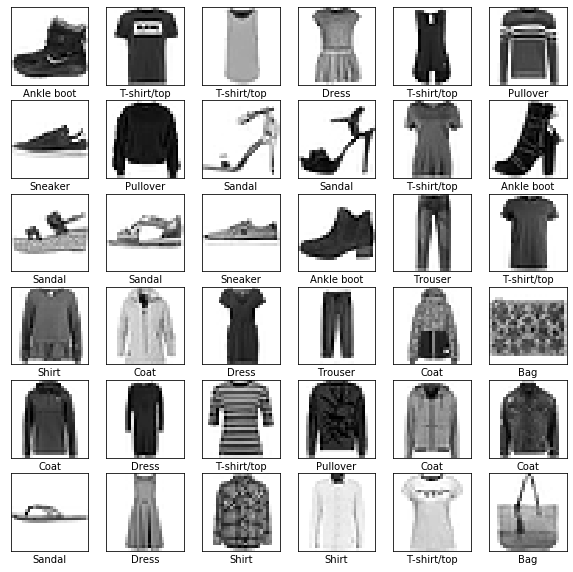

In [9]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

In [10]:
if tf.__version__.startswith("1."):
    val_acc_name = "val_acc"
    acc_name = "acc"
else:
    val_acc_name = "val_accuracy"
    acc_name = "accuracy"

## Baseline model

In [11]:
tf.keras.backend.clear_session()

DROPOUT_RATE = 0.2
DENSE_SIZE = 512

inputs = Input(shape=(28,28,1), name="Input")
h_0 = Flatten()(inputs)

h_1 = Dense(DENSE_SIZE, activation='relu', name="hidden_1")(h_0)
h_1_2 = Dense(DENSE_SIZE, activation='tanh', name="hidden_1_2")(h_0)
h_1_3 = Dense(DENSE_SIZE, activation='sigmoid', name="hidden_1_3")(h_0)
h_1_concat = Concatenate()([h_1, h_1_2, h_1_3])
drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1_concat)

h_2 = Dense(DENSE_SIZE, activation='relu', name="hidden_2")(drop_1)
h_2_2 = Dense(DENSE_SIZE, activation='tanh', name="hidden_2_2")(drop_1)
h_2_3 = Dense(DENSE_SIZE, activation='sigmoid', name="hidden_2_3")(drop_1)
h_2_concat = Concatenate()([h_2, h_2_2, h_2_3])
drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2_concat)

predictions = Dense(10, activation='softmax', name="Output")(drop_2)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           Input[0][0]                      
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 512)          401920      flatten[0][0]                    
__________________________________________________________________________________________________
hidden_1_2 (Dense)              (None, 512)          401920      flatten[0]

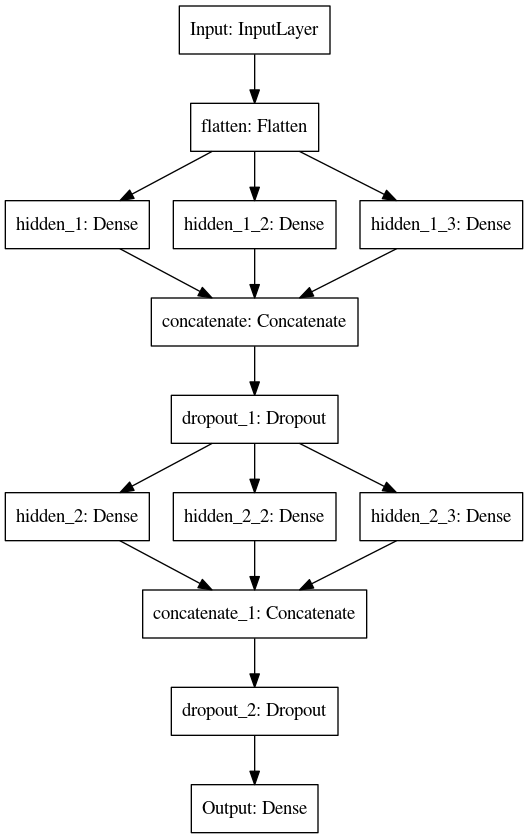

In [12]:
plot_model(model)

In [13]:
checkpoint = ModelCheckpoint('mnist-fashion_base.hdf5',
                            monitor=val_acc_name,
                            save_best_only=True,
                            period=5,
                            verbose=1)

In [14]:
early_stopping_callback = EarlyStopping(monitor=val_acc_name, 
                                        min_delta=1e-9, 
                                        patience=50, 
                                        verbose=1, 
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=True)

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor=val_acc_name,
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00000001)

In [16]:
%%time
BATCH_SIZE = 1024
EPOCHS = 10000000000
history = model.fit(x=train_images, y=train_labels, batch_size=BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_data=(test_images, test_labels),
                   
                   verbose=1,
                   callbacks=[checkpoint, learning_rate_reduction, early_stopping_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10000000000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8765 - acc: 0.7297 - val_loss: 0.4692 - val_acc: 0.8293
Epoch 2/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4281 - acc: 0.8452 - val_loss: 0.4190 - val_acc: 0.8514
Epoch 3/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3864 - acc: 0.8601 - val_loss: 0.3934 - val_acc: 0.8566
Epoch 4/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3553 - acc: 0.8708 - val_loss: 0.3810 - val_acc: 0.8603
Epoch 5/10000000000
56320/60000 [===========================>..] - ETA: 0s - loss: 0.3413 - acc: 0.8749
Epoch 00005: val_acc improved from -inf to 0.86960, saving model to mnist-fashion_base.hdf5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3403 - acc: 0.8753 - val_loss: 0.3654 - val_acc: 0.8696
Epoch 6/10000000000
60000/60000 [=

60000/60000 [==============================] - 1s 12us/sample - loss: 0.1031 - acc: 0.9618 - val_loss: 0.3125 - val_acc: 0.9039
Epoch 46/10000000000
60000/60000 [==============================] - 1s 9us/sample - loss: 0.1066 - acc: 0.9597 - val_loss: 0.3107 - val_acc: 0.9068
Epoch 47/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1002 - acc: 0.9630 - val_loss: 0.3128 - val_acc: 0.9034
Epoch 48/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0990 - acc: 0.9642 - val_loss: 0.3169 - val_acc: 0.9041
Epoch 49/10000000000
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0977 - acc: 0.9636 - val_loss: 0.3161 - val_acc: 0.9038
Epoch 50/10000000000
55296/60000 [==========================>...] - ETA: 0s - loss: 0.0947 - acc: 0.9656
Epoch 00050: val_acc did not improve from 0.90390
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0950 - acc: 0.9656 - val_loss: 0.3199 - val_acc: 0

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0666 - acc: 0.9774
Epoch 00086: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0666 - acc: 0.9775 - val_loss: 0.3337 - val_acc: 0.9069
Epoch 87/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0660 - acc: 0.9766 - val_loss: 0.3335 - val_acc: 0.9069
Epoch 88/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0658 - acc: 0.9776 - val_loss: 0.3336 - val_acc: 0.9069
Epoch 89/10000000000
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0676 - acc: 0.9765 - val_loss: 0.3335 - val_acc: 0.9068
Epoch 90/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.0657 - acc: 0.9775
Epoch 00090: val_acc did not improve from 0.90730
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0659 - acc: 0.9775 - val_loss: 0.

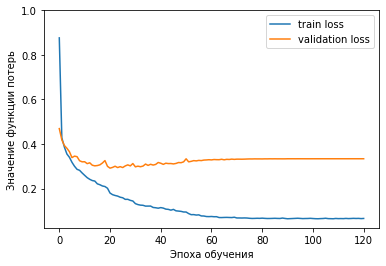

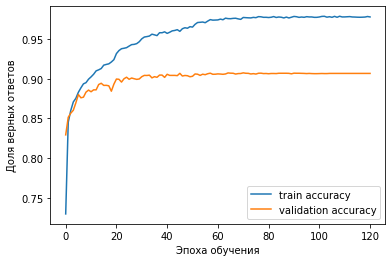

In [17]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylim(top=1)
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()

plt.figure()
plt.plot(history.history[acc_name], label='train accuracy')
plt.plot(history.history[val_acc_name], label='validation accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3321 - acc: 0.9074


[0.3320928779646754, 0.9074]

## Baseline model with ensemble

In [19]:
tf.keras.backend.clear_session()

DROPOUT_RATE = 0.2
DENSE_SIZE = 512
ENS_MODELS_COUNT = 4

inputs = Input(shape=(28,28,1), name="Input")
h_0 = Flatten()(inputs)

outs = []
for i in range(ENS_MODELS_COUNT):
    h_1 = Dense(DENSE_SIZE, activation='relu', name="hidden_1_%d" % i)(h_0)
    h_1_2 = Dense(DENSE_SIZE, activation='tanh', name="hidden_1_2_%d" % i)(h_0)
    h_1_3 = Dense(DENSE_SIZE, activation='sigmoid', name="hidden_1_3_%d" % i)(h_0)
    h_1_concat = Concatenate()([h_1, h_1_2, h_1_3])
    drop_1 = Dropout(DROPOUT_RATE, name="dropout_1_%d" % i)(h_1_concat)

    h_2 = Dense(DENSE_SIZE, activation='relu', name="hidden_2_%d" % i)(drop_1)
    h_2_2 = Dense(DENSE_SIZE, activation='tanh', name="hidden_2_2_%d" % i)(drop_1)
    h_2_3 = Dense(DENSE_SIZE, activation='sigmoid', name="hidden_2_3_%d" % i)(drop_1)
    h_2_concat = Concatenate()([h_2, h_2_2, h_2_3])
    drop_2 = Dropout(DROPOUT_RATE, name="dropout_2_%d" % i)(h_2_concat)

    predictions = Dense(10, activation='softmax', name="Output_%d" % i)(drop_2)
    outs.append(predictions)

out = Average()(outs)

model = Model(inputs=inputs, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           Input[0][0]                      
__________________________________________________________________________________________________
hidden_1_0 (Dense)              (None, 512)          401920      flatten[0][0]                    
__________________________________________________________________________________________________
hidden_1_2_0 (Dense)            (None, 512)          401920      flatten[0][0]                    
______________________________________________________________________________________________

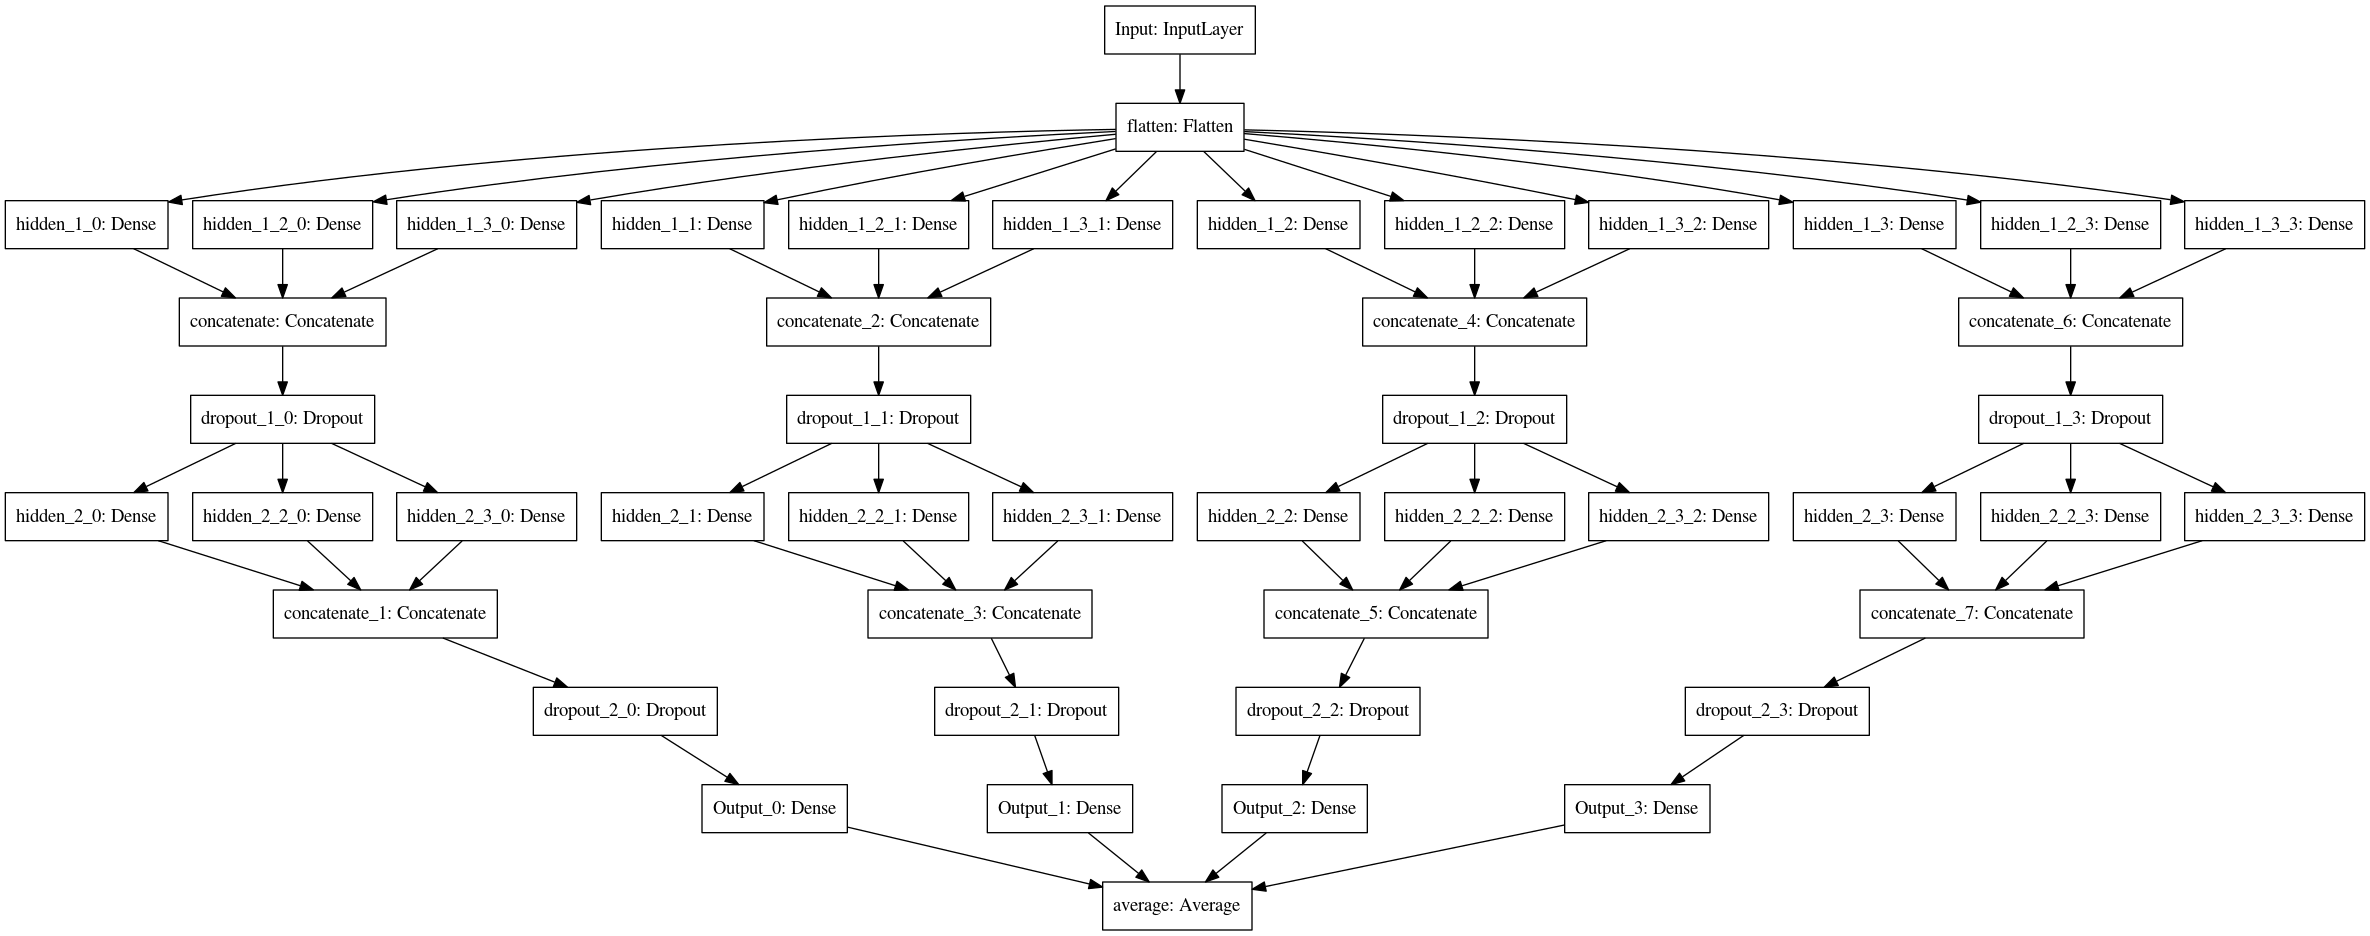

In [20]:
plot_model(model)

In [21]:
checkpoint = ModelCheckpoint('mnist-fashion_base_ensemble.hdf5',
                            monitor=val_acc_name,
                            save_best_only=True,
                            period=5,
                            verbose=1)

In [22]:
early_stopping_callback = EarlyStopping(monitor=val_acc_name, 
                                        min_delta=1e-9, 
                                        patience=50, 
                                        verbose=1, 
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=True)

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor=val_acc_name,
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00000001)

In [24]:
%%time
BATCH_SIZE = 1024
EPOCHS = 10000000000
history = model.fit(x=train_images, y=train_labels, batch_size=BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_data=(test_images, test_labels),
                   
                   verbose=1,
                   callbacks=[checkpoint, learning_rate_reduction, early_stopping_callback])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10000000000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.9286 - acc: 0.6809 - val_loss: 0.7422 - val_acc: 0.7370
Epoch 2/10000000000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6669 - acc: 0.7725 - val_loss: 0.6583 - val_acc: 0.7755
Epoch 3/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6305 - acc: 0.7858 - val_loss: 0.6653 - val_acc: 0.7792
Epoch 4/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5771 - acc: 0.8376 - val_loss: 0.5872 - val_acc: 0.8360
Epoch 5/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.5508 - acc: 0.8498
Epoch 00005: val_acc improved from -inf to 0.83830, saving model to mnist-fashion_base_ensemble.hdf5
60000/60000 [==============================] - 3s 42us/samp

60000/60000 [==============================] - 2s 28us/sample - loss: 0.2610 - acc: 0.9271 - val_loss: 0.4051 - val_acc: 0.8939
Epoch 44/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2597 - acc: 0.9284 - val_loss: 0.4112 - val_acc: 0.8921
Epoch 45/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.2510 - acc: 0.9287
Epoch 00045: val_acc improved from 0.88720 to 0.89190, saving model to mnist-fashion_base_ensemble.hdf5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2508 - acc: 0.9288 - val_loss: 0.4039 - val_acc: 0.8919
Epoch 46/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2396 - acc: 0.9277 - val_loss: 0.3951 - val_acc: 0.8900
Epoch 47/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.2344 - acc: 0.9301
Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
60000/60000 [==============================] - 2s 29

58368/60000 [============================>.] - ETA: 0s - loss: 0.1900 - acc: 0.9499
Epoch 00085: val_acc did not improve from 0.90040
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1900 - acc: 0.9498 - val_loss: 0.3972 - val_acc: 0.9003
Epoch 86/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.1896 - acc: 0.9506
Epoch 00086: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1896 - acc: 0.9507 - val_loss: 0.3976 - val_acc: 0.9003
Epoch 87/10000000000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1892 - acc: 0.9500 - val_loss: 0.3980 - val_acc: 0.9006
Epoch 88/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1885 - acc: 0.9501 - val_loss: 0.3984 - val_acc: 0.9005
Epoch 89/10000000000
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1886 - acc: 0.9506 - val_loss: 0.

60000/60000 [==============================] - 2s 29us/sample - loss: 0.1872 - acc: 0.9517 - val_loss: 0.3988 - val_acc: 0.9005
Epoch 127/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1869 - acc: 0.9517 - val_loss: 0.3988 - val_acc: 0.9006
Epoch 128/10000000000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1872 - acc: 0.9512 - val_loss: 0.3988 - val_acc: 0.9006
Epoch 129/10000000000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1869 - acc: 0.9514 - val_loss: 0.3988 - val_acc: 0.9008
Epoch 130/10000000000
58368/60000 [============================>.] - ETA: 0s - loss: 0.1878 - acc: 0.9509
Epoch 00130: val_acc did not improve from 0.90140

Epoch 00130: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1877 - acc: 0.9511 - val_loss: 0.3988 - val_acc: 0.9006
Epoch 131/10000000000
60000/60000 [======================

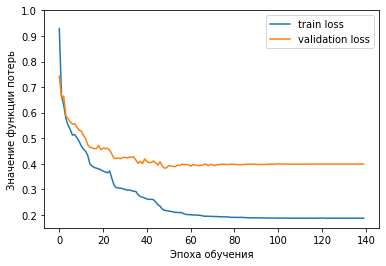

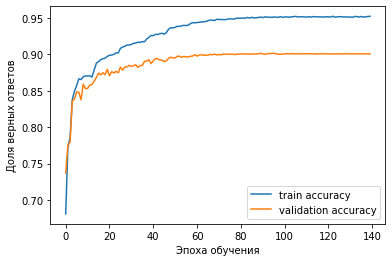

In [25]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylim(top=1)
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()

plt.figure()
plt.plot(history.history[acc_name], label='train accuracy')
plt.plot(history.history[val_acc_name], label='validation accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()

In [26]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.3982 - acc: 0.9014


[0.39819640979766846, 0.9014]

## Advanced model

In [27]:
# #### VARIANT 3 ####
# tf.keras.backend.clear_session()

# DROPOUT_RATE = 0.2
# DENSE_SIZE = 512
# L2_REG = 0.1

# inputs = Input(shape=(28,28,1), name="Input")
# h_0 = Flatten()(inputs)
# h_bn = BatchNormalization(axis=1)(h_0)


# h_1 = Dense(DENSE_SIZE, activation='relu', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_1")(h_bn)
# h_1_bn = BatchNormalization(axis=1)(h_1)
# h_1_2 = Dense(DENSE_SIZE, activation='tanh', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_1_2")(h_bn)
# h_1_2_bn = BatchNormalization(axis=1)(h_1_2)
# h_1_3 = Dense(DENSE_SIZE, activation='sigmoid', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_1_3")(h_bn)
# h_1_3_bn = BatchNormalization(axis=1)(h_1_3)
# h_1_concat = Concatenate()([h_1_bn, h_1_2_bn, h_1_3_bn])
# drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1_concat)


# h_2 = Dense(DENSE_SIZE, activation='relu', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_2")(drop_1)
# h_2_bn = BatchNormalization(axis=1)(h_2)
# h_2_2 = Dense(DENSE_SIZE, activation='tanh', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_2_2")(drop_1)
# h_2_2_bn = BatchNormalization(axis=1)(h_2_2)
# h_2_3 = Dense(DENSE_SIZE, activation='sigmoid', 
#             kernel_regularizer=regularizers.l2(L2_REG), 
#             kernel_initializer='he_uniform',
#             bias_initializer='zeros', 
#             name="hidden_2_3")(drop_1)
# h_2_3_bn = BatchNormalization(axis=1)(h_2_3)
# h_2_concat = Concatenate()([h_2_bn, h_2_2_bn, h_2_3_bn])
# drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2_concat)


# predictions = Dense(10, activation='softmax', 
#                     kernel_regularizer=regularizers.l2(L2_REG),
#                     kernel_initializer='glorot_uniform',
#                     name="Output")(drop_2)

# model = Model(inputs=inputs, outputs=predictions)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

In [28]:
#### VARIANT 3 ####
tf.keras.backend.clear_session()

DROPOUT_RATE = 0.2
DENSE_SIZE = 512
L2_REG = 0.005

inputs = Input(shape=(28,28,1), name="Input")
h_0 = Flatten()(inputs)
h_bn = BatchNormalization(axis=1)(h_0)


h_1 = Dense(DENSE_SIZE, activation='relu', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_1")(h_bn)
h_1_2 = Dense(DENSE_SIZE, activation='tanh', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_1_2")(h_bn)
h_1_3 = Dense(DENSE_SIZE, activation='sigmoid', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_1_3")(h_bn)
h_1_concat = Concatenate()([h_1, h_1_2, h_1_3])
h_1_bn = BatchNormalization(axis=1)(h_1_concat)
drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1_bn)


h_2 = Dense(DENSE_SIZE, activation='relu', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_2")(drop_1)
h_2_2 = Dense(DENSE_SIZE, activation='tanh', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_2_2")(drop_1)
h_2_3 = Dense(DENSE_SIZE, activation='sigmoid', 
            kernel_regularizer=regularizers.l2(L2_REG), 
            kernel_initializer='he_uniform',
            bias_initializer=initializers.Constant(0.1), 
            name="hidden_2_3")(drop_1)
h_2_concat = Concatenate()([h_2, h_2_2, h_2_3])
h_2_bn = BatchNormalization(axis=1)(h_2_concat)

drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2_concat)


predictions = Dense(10, activation='softmax', 
                    kernel_regularizer=regularizers.l2(L2_REG),
                    kernel_initializer='glorot_uniform',
                    name="Output")(drop_2)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           Input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 784)          3136        flatten[0][0]                    
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 512)          401920      batch_normalization[0][0]        
______________________________________________________________________________________________

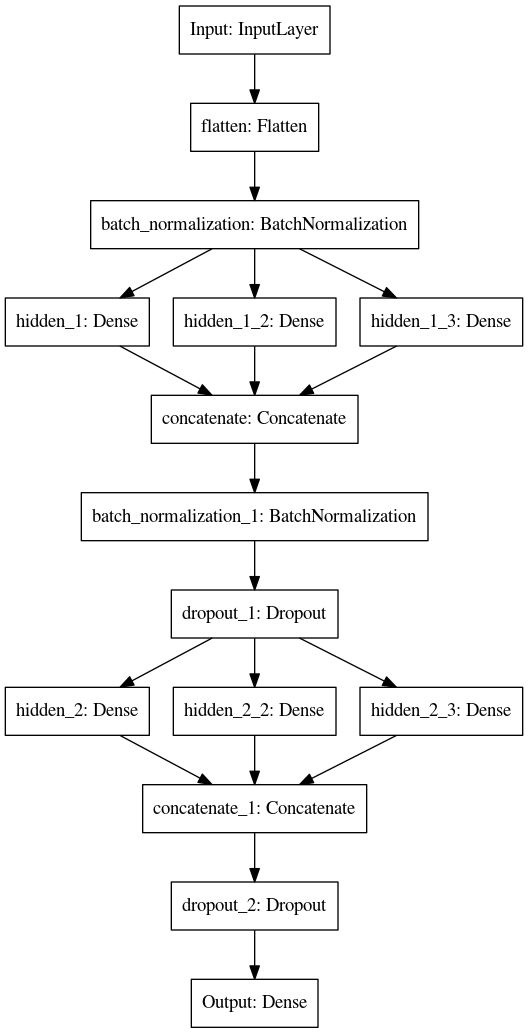

In [29]:
plot_model(model)

In [30]:
checkpoint = ModelCheckpoint('mnist-fashion_advanced_model.hdf5',
                            monitor=val_acc_name,
                            save_best_only=True,
                            period=5,
                            verbose=1)

In [31]:
early_stopping_callback = EarlyStopping(monitor=val_acc_name, 
                                        min_delta=1e-9, 
                                        patience=50, 
                                        verbose=1, 
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=True)

In [32]:
learning_rate_reduction = ReduceLROnPlateau(monitor=val_acc_name,
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00000001)

In [33]:
%%time
BATCH_SIZE = 1024
EPOCHS = 10000000000
history = model.fit(x=train_images, y=train_labels, batch_size=BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_data=(test_images, test_labels),
                   
                   verbose=1,
                   callbacks=[checkpoint, learning_rate_reduction, early_stopping_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10000000000
60000/60000 [==============================] - 1s 18us/sample - loss: 18.6416 - acc: 0.8059 - val_loss: 8.5805 - val_acc: 0.7247
Epoch 2/10000000000
60000/60000 [==============================] - 1s 13us/sample - loss: 4.2750 - acc: 0.8528 - val_loss: 2.8246 - val_acc: 0.6287
Epoch 3/10000000000
60000/60000 [==============================] - 1s 13us/sample - loss: 1.3270 - acc: 0.8590 - val_loss: 1.4645 - val_acc: 0.7459
Epoch 4/10000000000
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7280 - acc: 0.8631 - val_loss: 0.9263 - val_acc: 0.8327
Epoch 5/10000000000
55296/60000 [==========================>...] - ETA: 0s - loss: 0.6020 - acc: 0.8610
Epoch 00005: val_acc improved from -inf to 0.81980, saving model to mnist-fashion_advanced_model.hdf5
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5997 - acc: 0.8615 - val_loss: 0.7739 - val_acc: 0.8198
Epoch 6/10000000000
600

Epoch 43/10000000000
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2392 - acc: 0.9605 - val_loss: 0.4075 - val_acc: 0.9016
Epoch 44/10000000000
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2318 - acc: 0.9626 - val_loss: 0.4090 - val_acc: 0.9004
Epoch 45/10000000000
56320/60000 [===========================>..] - ETA: 0s - loss: 0.2295 - acc: 0.9637
Epoch 00045: val_acc improved from 0.89970 to 0.90080, saving model to mnist-fashion_advanced_model.hdf5
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2300 - acc: 0.9633 - val_loss: 0.4119 - val_acc: 0.9008
Epoch 46/10000000000
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2265 - acc: 0.9645 - val_loss: 0.4085 - val_acc: 0.9034
Epoch 47/10000000000
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2262 - acc: 0.9643 - val_loss: 0.4095 - val_acc: 0.9018
Epoch 48/10000000000
60000/60000 [==============================] 

60000/60000 [==============================] - 1s 12us/sample - loss: 0.1852 - acc: 0.9821 - val_loss: 0.4168 - val_acc: 0.9022
Epoch 83/10000000000
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1854 - acc: 0.9825 - val_loss: 0.4170 - val_acc: 0.9023
Epoch 84/10000000000
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1856 - acc: 0.9822 - val_loss: 0.4169 - val_acc: 0.9026
Epoch 85/10000000000
57344/60000 [===========================>..] - ETA: 0s - loss: 0.1850 - acc: 0.9821
Epoch 00085: val_acc did not improve from 0.90270
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1853 - acc: 0.9818 - val_loss: 0.4170 - val_acc: 0.9023
Epoch 86/10000000000
57344/60000 [===========================>..] - ETA: 0s - loss: 0.1847 - acc: 0.9824
Epoch 00086: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1847 - acc: 0.9824 - val_loss: 0.4

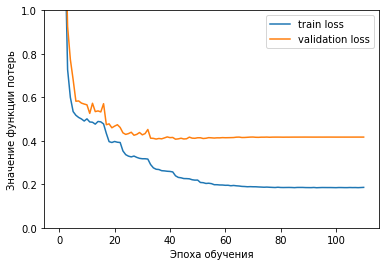

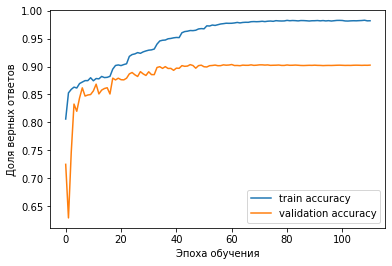

In [34]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylim(top=1, bottom=0)
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()

plt.figure()
plt.plot(history.history[acc_name], label='train accuracy')
plt.plot(history.history[val_acc_name], label='validation accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()

In [35]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.4142 - acc: 0.9036


[0.4142089951038361, 0.9036]